<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/01.%20Week%201/ClassificationHeartDisease_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('HeartDisease.csv')

Saving HeartDisease.csv to HeartDisease.csv


Accuracy: 0.8852
Precision: 0.8788
Recall: 0.9062
F1 Score: 0.8923
AUC Score: 0.9213


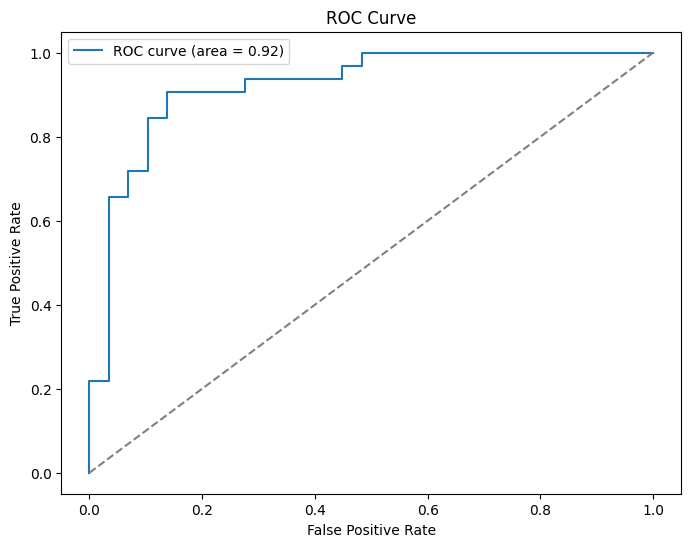


Mathematical Explanation:
Logistic Regression Function: P(y=1|X) = 1 / (1 + exp(- (wX + b)))
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
AUC measures the area under the ROC curve, where higher values indicate better performance.


In [ ]:
df.fillna(df.median(), inplace=True)

df['num'] = (df['num'] > 0).astype(int)

X = df.drop(columns=['num'])
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC Score: {auc:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("\nMathematical Explanation:")
print("Logistic Regression Function: P(y=1|X) = 1 / (1 + exp(- (wX + b)))")
print("Accuracy = (TP + TN) / (TP + TN + FP + FN)")
print("Precision = TP / (TP + FP)")
print("Recall = TP / (TP + FN)")
print("F1 Score = 2 * (Precision * Recall) / (Precision + Recall)")
print("AUC measures the area under the ROC curve, where higher values indicate better performance.")
